# Домашнее задание 3 - Проверка статистических гипотез и параметрические критерии

**ВАЖНО: Обязательно для каждой задачи строим график и показываем куда попадает наше значение, если в задаче нужно проверить статистическую гипотезу**
\
**При отсутствии графиков возможна полная потеря баллов за задание**

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, poisson, binom

### Задача 1 (1 балл)

Пусть X1,X2,…,Xn​ — независимые и одинаково распределенные случайные величины из нормального распределения с неизвестным средним μ и известной дисперсией σ^2=25. Из выборки объема n=64 получено выборочное среднее =102.
\
Проверьте гипотезу H0:μ=100 против альтернативы H1:μ>100 на уровне значимости α=0.01.
\
Вычислите p-значение этого теста.

In [2]:
# Исходные данные
sigma = np.sqrt(25)
n = 64
x_mean = 102
mu0 = 100
alpha = 0.01

In [3]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# z-статистика
z_score = (x_mean - mu0) / se
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_crit:
    print("Отклоняем нулевую гипотезу: среднее значение увеличилось")
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого увеличения значения"
    )

Стандартная ошибка (se): 0.62
z-статистика: 3.20
Критическое значение: 2.33
p-значение: 0.00069
Отклоняем нулевую гипотезу: среднее значение увеличилось


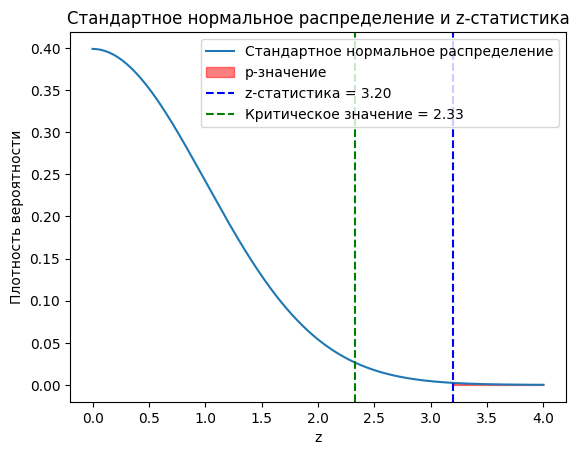

In [4]:
z_values = np.linspace(0, 4, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_score)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 2 (1 балл)

Даны три независимые выборки. Первая выборка объемом 35 наблюдений имеет выборочное среднее 10.2 и выборочную дисперсию 2.5. Вторая выборка объемом 30 наблюдений имеет выборочное среднее 9.8 и выборочную дисперсию 2.8. Третья выборка объемом 40 наблюдений имеет выборочное среднее 10.5 и выборочную дисперсию 3.0.

Проверьте гипотезу о том, что средние всех трех выборок равны, на уровне значимости 0.05.
Оцените статистическую значимость результатов и постройте доверительные интервалы c графиками для каждого из средних.

In [5]:
# Данные задачи
n1 = 35
x1_mean = 10.2
s1 = 2.5

n2 = 30
x2_mean = 9.8
s2 = 2.8

n3 = 40
x3_mean = 10.5
s3 = 3.0

alpha = 0.05

In [6]:
# Объединенная выборочная дисперсия
df = n1 + n2 + n3 - 3
sp3 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2 + (n3 - 1) * s3**2) / df
print(f"Объединенная выборочная дисперсия: {sp3:.2f}")

# Стандартная ошибка
se = np.sqrt(sp3 * (1 / n1 + 1 / n2 + 1 / n3))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (x2_mean - x1_mean) / se
print(f"t-статистика (группа B против группы A): {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение (группа B против группы A): {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print(
        "Отклоняем нулевую гипотезу: средний результат в группе B выше, чем в группе A"
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе B по сравнению с группой A"
    )

Объединенная выборочная дисперсия: 7.75
Стандартная ошибка (se): 0.82
t-статистика (группа B против группы A): -0.49
Критическое значение t: 1.66
p-значение (группа B против группы A): 0.68645
Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе B по сравнению с группой A


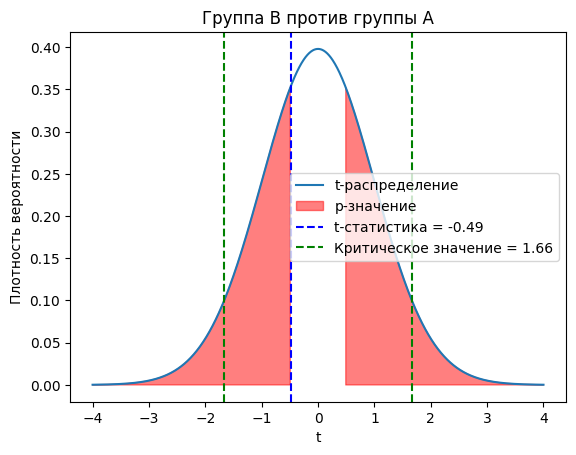

In [7]:
t_values = np.linspace(-4, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)
plt.axvline(-t_crit, color="green", linestyle="--")

plt.legend()
plt.title("Группа B против группы A")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

In [8]:
# Аналогичные вычисления для группы C
t_stat = (x3_mean - x1_mean) / se
print(f"t-статистика (группа C против группы A): {t_stat:.2f}")

p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение (группа C против группы A): {p_value:.2f}")

# Принятие решения
if t_stat > t_crit:
    print(
        "Отклоняем нулевую гипотезу: средний результат в группе C выше, чем в группе A"
    )
else:
    print(
        "Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе C по сравнению с группой A"
    )

t-статистика (группа C против группы A): 0.37
p-значение (группа C против группы A): 0.36
Не отклоняем нулевую гипотезу: нет статистически значимого повышения среднего результата в группе C по сравнению с группой A


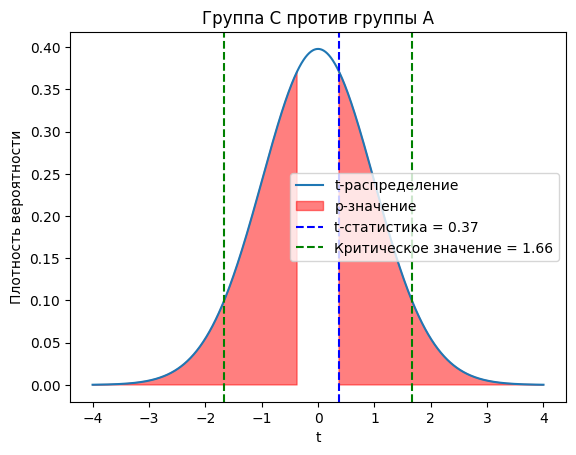

In [9]:
t_values = np.linspace(-4, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)
plt.axvline(-t_crit, color="green", linestyle="--")

plt.legend()
plt.title("Группа C против группы A")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

In [13]:
norm_rv = norm(loc=0, scale=1)

# Рассчитываем квантиль
z_alpha = norm_rv.ppf(1 - alpha / 2)

# Посчитаем стандартное отклонение
x1_std = x1_mean / np.sqrt(n1)

# Посчитаем границы доверительного интервала
x1_left = x1_mean - z_alpha * x1_std
x1_right = x1_mean + z_alpha * x1_std

print(
    f"Доверительный интервал группы А: [{x1_left:.2}, {x1_right:.2}] ширины {x1_right - x1_left:.2}"
)

# Посчитаем стандартное отклонение
x2_std = x2_mean / np.sqrt(n2)

# Посчитаем границы доверительного интервала
x2_left = x2_mean - z_alpha * x2_std
x2_right = x2_mean + z_alpha * x2_std

print(
    f"Доверительный интервал группы В: [{x2_left:.2}, {x2_right:.2}] ширины {x2_right - x2_left:.2}"
)

# Посчитаем стандартное отклонение
x3_std = x3_mean / np.sqrt(n3)

# Посчитаем границы доверительного интервала
x3_left = x3_mean - z_alpha * x3_std
x3_right = x3_mean + z_alpha * x3_std

print(
    f"Доверительный интервал группы С: [{x3_left:.2}, {x3_right:.2}] ширины {x3_right - x3_left:.2}"
)

Доверительный интервал группы А: [6.8, 1.4e+01] ширины 6.8
Доверительный интервал группы В: [6.3, 1.3e+01] ширины 7.0
Доверительный интервал группы С: [7.2, 1.4e+01] ширины 6.5


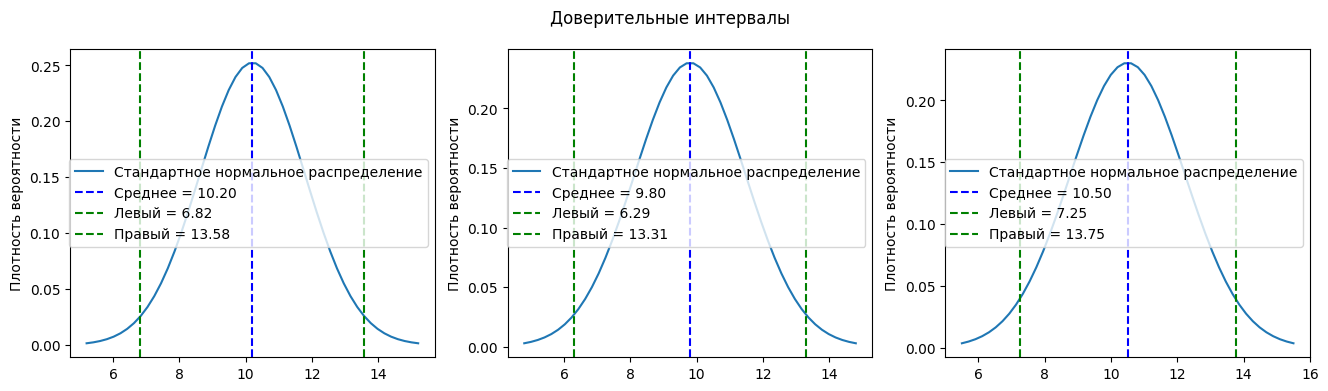

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

fig.suptitle("Доверительные интервалы")

# Выборка 1
xs1 = np.linspace(x1_mean - 5, x1_mean + 5)
pdf1 = norm(x1_mean, np.sqrt(s1)).pdf(xs1)

# Выборка 1
ax1.plot(xs1, pdf1, label="Стандартное нормальное распределение")

# Отмечаем среднее
ax1.axvline(x1_mean, color="blue", linestyle="--", label=f"Среднее = {x1_mean:.2f}")

# Отмечаем критические значения
ax1.axvline(x1_left, color="green", linestyle="--", label=f"Левый = {x1_left:.2f}")
ax1.axvline(x1_right, color="green", linestyle="--", label=f"Правый = {x1_right:.2f}")

ax1.legend()
ax1.set_ylabel(ylabel="Плотность вероятности")


# Выборка 2
xs2 = np.linspace(x2_mean - 5, x2_mean + 5)
pdf2 = norm(x2_mean, np.sqrt(s2)).pdf(xs2)

ax2.plot(xs2, pdf2, label="Стандартное нормальное распределение")

# Отмечаем среднее
ax2.axvline(x2_mean, color="blue", linestyle="--", label=f"Среднее = {x2_mean:.2f}")

# Отмечаем критические значения
ax2.axvline(x2_left, color="green", linestyle="--", label=f"Левый = {x2_left:.2f}")
ax2.axvline(x2_right, color="green", linestyle="--", label=f"Правый = {x2_right:.2f}")

ax2.legend()
ax2.set_ylabel(ylabel="Плотность вероятности")


# Выборка 3
xs3 = np.linspace(x3_mean - 5, x3_mean + 5)
pdf3 = norm(x3_mean, np.sqrt(s3)).pdf(xs3)

ax3.plot(xs3, pdf3, label="Стандартное нормальное распределение")

# Отмечаем среднее
ax3.axvline(x3_mean, color="blue", linestyle="--", label=f"Среднее = {x3_mean:.2f}")

# Отмечаем критические значения
ax3.axvline(x3_left, color="green", linestyle="--", label=f"Левый = {x3_left:.2f}")
ax3.axvline(x3_right, color="green", linestyle="--", label=f"Правый = {x3_right:.2f}")

ax3.legend()
ax3.set_ylabel(ylabel="Плотность вероятности")

plt.show()

### Задача 3 (1 балл)

Тестирование параметра распределения Пуассона

Выборка из 60 наблюдений была получена из распределения Пуассона с неизвестным параметром. Известно, что среднее количество наблюдений в выборке равно 4.8.

Проверьте гипотезу о том, что параметр распределения Пуассона равен 5 против альтернативы, что он меньше 5. Используйте уровень значимости 0.05.
Вычислите p-значение и сделайте вывод о гипотезе.

In [16]:
# Известные параметры
n = 60
x_mean = 4.8
mu0 = 5
alpha = 0.05

In [17]:
# z-статистика
z_score = (x_mean - mu0) / np.sqrt(mu0)
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_crit = norm.ppf(alpha / 2)
print(f"Критическое значение: {z_crit:.2f}")

# Вычисление p-значения
p_value = poisson.cdf(np.ceil(z_score), mu0)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_crit:
    print("Отклоняем нулевую гипотезу: параметр распределения Пуассона меньше 5")
else:
    print("Не отклоняем нулевую гипотезу: параметр распределения Пуассона равен 5")

z-статистика: -0.09
Критическое значение: -1.96
p-значение: 0.00674
Отклоняем нулевую гипотезу: параметр распределения Пуассона меньше 5


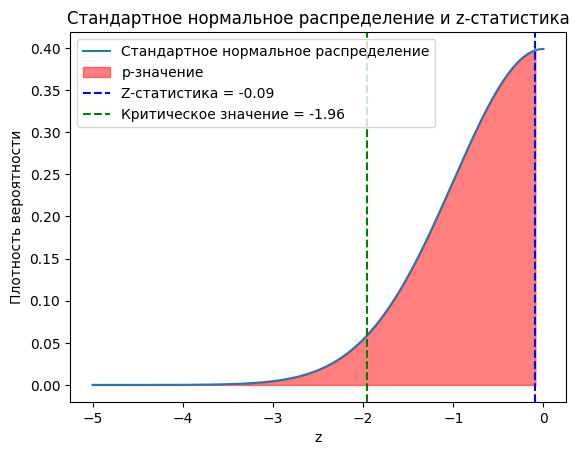

In [18]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"Z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_crit, color="green", linestyle="--", label=f"Критическое значение = {z_crit:.2f}"
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 4 (1 балл)

Компания заявляет, что среднее время работы их нового аккумулятора составляет 100 часов. Независимая лаборатория протестировала 25 случайно выбранных аккумуляторов и получила среднее время работы 95 часов при стандартном отклонении 10 часов. Можно ли на уровне значимости 1% утверждать, что реальное среднее время работы аккумуляторов меньше заявленного?

In [19]:
# Исходные данные
n = 25
x_mean = 95
sigma = 10
alpha = 0.01
mu0 = 100

In [20]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисляем t-статистику
t_stat = (x_mean - mu0) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение
z_crit = norm.ppf(alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Вычисляем p-значение
p_value = norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > z_crit:
    print("Отклоняем нулевую гипотезу: среднее время работы меньше заявленной")
else:
    print("Не отклоняем нулевую гипотезу: среднее время работы составляет 100 часов")

Стандартная ошибка (se): 2.00
t-статистика: -2.50
Критическое значение: -2.33
p-значение: 0.46437
Не отклоняем нулевую гипотезу: среднее время работы составляет 100 часов


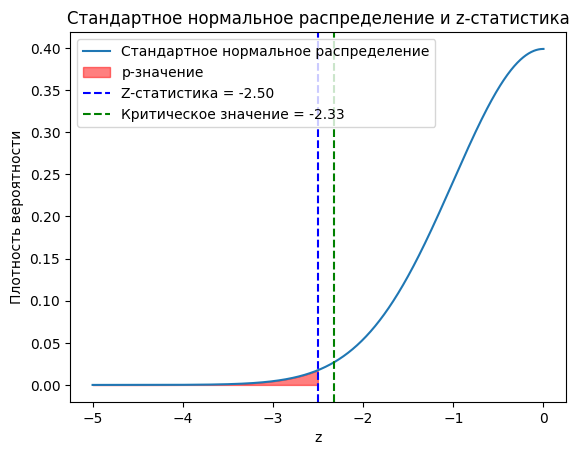

In [21]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"Z-статистика = {t_stat:.2f}")
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 5 (1 балл)

В ходе медицинского исследования сравнивается эффективность нового препарата для снижения артериального давления с существующим. Первой группе из 30 пациентов назначают новый препарат, и среднее снижение давления составляет 8 мм рт. ст. со стандартным отклонением 2 мм рт. ст. Второй группе из 30 пациентов дают существующий препарат, и среднее снижение составляет 6 мм рт. ст. со стандартным отклонением 3 мм рт. ст. Является ли новый препарат более эффективным на уровне значимости 5%?

In [22]:
# Входные данные
n_new = 30
mean_new = 8
std_new = 2

n_old = 30
mean_old = 6
std_old = 3

alpha = 0.05

In [23]:
# Объединенная выборочная дисперсия
df = n_new + n_old - 2
sp2 = ((n_new - 1) * std_new**2 + (n_old - 1) * std_old**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_new + 1 / n_old))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_new - mean_old) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: новый препарат более эффективный")
else:
    print("Не отклоняем нулевую гипотезу: результат препаратов одинаковый")


Объединенная выборочная дисперсия: 6.50
Стандартная ошибка (se): 0.66
t-статистика: 3.04
Критическое значение t: 1.67
p-значение: 0.00178
Отклоняем нулевую гипотезу: новый препарат более эффективный


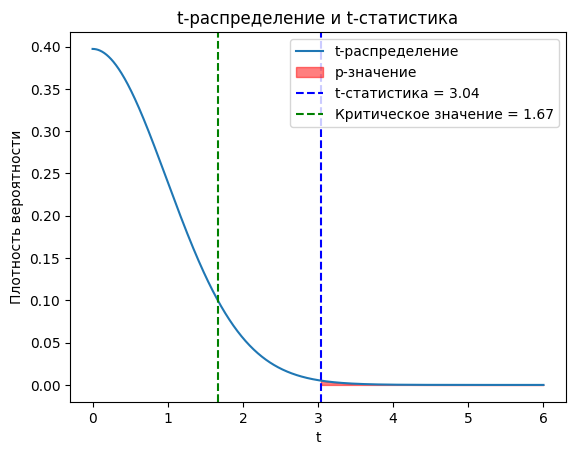

In [24]:
t_values = np.linspace(0, 6, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 6 (1 балл)

В университете внедрили новую методику преподавания математики и хотят оценить ее влияние на успеваемость студентов. Средний балл по математике в предыдущие годы был 75. После внедрения методики группа из 50 студентов получила средний балл 78 с стандартным отклонением 5. Проверить на уровне значимости 1%, улучшилась ли успеваемость студентов.

In [25]:
# Исходные данные
mu0 = 75
x_mean = 78
sigma = 5
n = 50
alpha = 0.01

In [26]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# z-статистика
z_score = (x_mean - mu0) / se
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_crit:
    print("Отклоняем нулевую гипотезу: результат улучшился")
else:
    print("Не отклоняем нулевую гипотезу: результат не изменился")

Стандартная ошибка (se): 0.71
z-статистика: 4.24
Критическое значение: 2.33
p-значение: 0.00001
Отклоняем нулевую гипотезу: результат улучшился


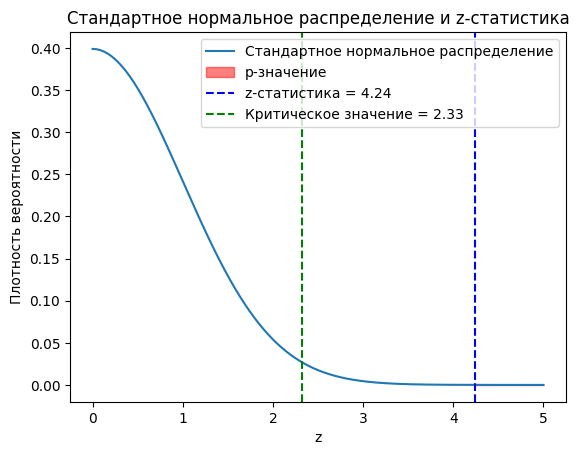

In [27]:
z_values = np.linspace(0, 5, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_score)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 7 (1 балл)

Производитель утверждает, что его новый процессор работает на 20% быстрее предыдущей модели. Для проверки этого заявления были протестированы 40 новых и 40 старых процессоров. Новые процессоры в среднем выполняли задачу за 8 секунд с стандартным отклонением 1 секунда, старые — за 10 секунд с стандартным отклонением 1,5 секунды. Соответствует ли утверждение производителя действительности на уровне значимости 2%?

In [28]:
n_old = 40
mean_old = 10
std_old = 1.5

n_new = 40
mean_new = 8
std_new = 1

alpha = 0.02

In [29]:
# Объединенная выборочная дисперсия
df = n_new + n_old - 2
sp2 = ((n_new - 1) * std_new**2 + (n_old - 1) * std_old**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_new + 1 / n_old))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_old - mean_new) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение: {p_value:.10f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: новые процессоры работают как старые")
else:
    print("Не отклоняем нулевую гипотезу: новые процессоры работают лучше старых")


Объединенная выборочная дисперсия: 1.62
Стандартная ошибка (se): 0.29
t-статистика: 7.02
Критическое значение t: 2.09
p-значение: 0.0000000004
Отклоняем нулевую гипотезу: новые процессоры работают как старые


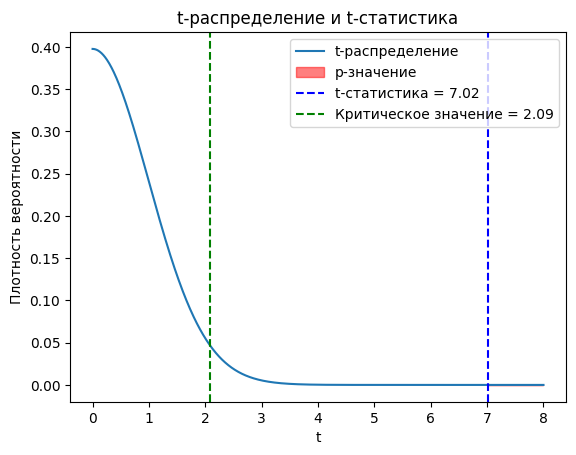

In [30]:
t_values = np.linspace(0, 8, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 8 (1 балл)

После введения новых экологических стандартов исследователь хочет определить, снизился ли уровень загрязнения воздуха в городе. До введения стандартов средняя концентрация вредных веществ составляла 50 мкг/м³. Через год после внедрения было проведено 36 измерений, и средняя концентрация составила 47 мкг/м³ со стандартным отклонением 4 мкг/м³. Можно ли на уровне значимости 5% считать, что уровень загрязнения воздуха снизился?

In [31]:
# Исходные данные
sigma = 4
n = 36
x_mean = 47
mu0 = 50
alpha = 0.05

In [32]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисляем t-статистику
t_stat = (x_mean - mu0) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение
z_crit = norm.ppf(alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Вычисляем p-значение
p_value = norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > z_crit:
    print("Отклоняем нулевую гипотезу: уровень загрязнения воздуха снизился")
else:
    print(
        "Не отклоняем нулевую гипотезу: уровень загрязнения воздуха остался на том же уровне"
    )

Стандартная ошибка (se): 0.67
t-статистика: -4.50
Критическое значение: -1.64
p-значение: 0.99999
Не отклоняем нулевую гипотезу: уровень загрязнения воздуха остался на том же уровне


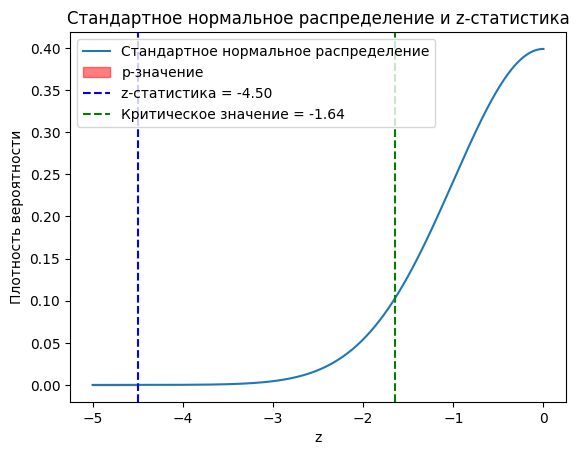

In [33]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"z-статистика = {t_stat:.2f}")
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 9 (1 балл)

В школе проводят эксперимент, чтобы выяснить, влияет ли дополнительное занятие по чтению на скорость чтения учеников. Учеников случайным образом разделили на две группы по 20 человек. Первая группа занималась по стандартной программе и показала среднюю скорость чтения 150 слов в минуту со стандартным отклонением 15 слов. Вторая группа посещала дополнительные занятия и показала среднюю скорость 160 слов в минуту со стандартным отклонением 10 слов. Является ли разница в скоростях статистически значимой на уровне значимости 5%?

In [39]:
# Параметры первой группы
n_1 = 20
mean_1 = 150
std_1 = 15

# Параметры второй группы
n_2 = 20
mean_2 = 160
std_2 = 10

alpha = 0.05

In [40]:
# Объединенная выборочная дисперсия
df = n_1 + n_2 - 2
sp2 = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_1 + 1 / n_2))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_2 - mean_1) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 2 * (1 - norm.cdf(abs(t_stat)))
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: уровень чтения улучшился")
else:
    print("Не отклоняем нулевую гипотезу: уровень чтения не изменился")


Объединенная выборочная дисперсия: 162.50
Стандартная ошибка (se): 4.03
t-статистика: 2.48
Критическое значение t: 1.69
p-значение: 0.01311
Отклоняем нулевую гипотезу: уровень чтения улучшился


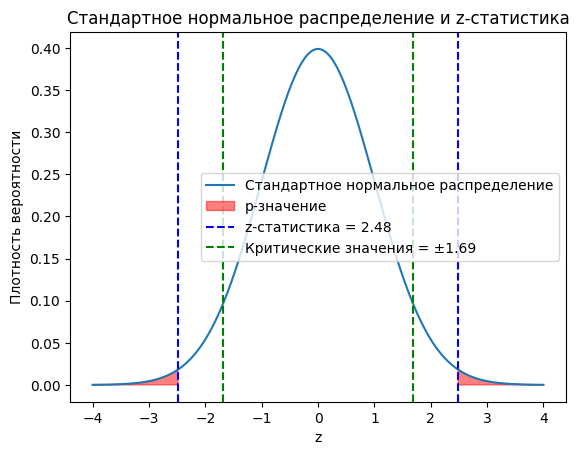

In [41]:
z_values = np.linspace(-4, 4, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"z-статистика = {t_stat:.2f}")
plt.axvline(-t_stat, color="blue", linestyle="--")

# Отмечаем критические значения
plt.axvline(
    -t_crit,
    color="green",
    linestyle="--",
    label=f"Критические значения = ±{t_crit:.2f}",
)
plt.axvline(t_crit, color="green", linestyle="--")

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 10 (1 балл)

Автомобильная компания хочет определить, влияет ли новый тип топлива на эффективность расхода топлива. В тесте участвовали 30 автомобилей, использующих обычное топливо, и 30 автомобилей на новом топливе. Средний расход для обычного топлива составил 8 литров на 100 км с стандартным отклонением 0,5 литра, для нового топлива — 7,5 литров на 100 км с стандартным отклонением 0,4 литра. Проверьте на уровне значимости 1%, улучшает ли новый тип топлива эффективность.

In [42]:
# Параметры первой группы
n_1 = 30
mean_1 = 8
std_1 = 0.5

# Параметры второй группы
n_2 = 30
mean_2 = 7.5
std_2 = 0.4

alpha = 0.01

In [43]:
# Объединенная выборочная дисперсия
df = n_1 + n_2 - 2
sp2 = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_1 + 1 / n_2))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_2 - mean_1) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: расход топлива снизился")
else:
    print("Не отклоняем нулевую гипотезу: расход топлива без изменений")


Объединенная выборочная дисперсия: 0.21
Стандартная ошибка (se): 0.12
t-статистика: -4.28
Критическое значение t: -2.39
p-значение: 0.00004
Не отклоняем нулевую гипотезу: расход топлива без изменений


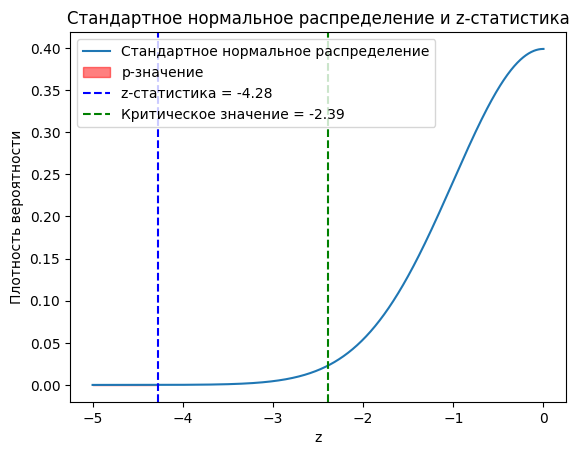

In [44]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"z-статистика = {t_stat:.2f}")
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 11 (1 балл)

В исследовании психологии изучается влияние медитации на уровень стресса. Уровень стресса измеряется по шкале от 0 до 100. До начала программы медитации у группы из 25 участников средний уровень стресса был 70 с стандартным отклонением 8. После программы средний уровень снизился до 65 с стандартным отклонением 7. Является ли снижение уровня стресса статистически значимым на уровне значимости 5%?

In [45]:
# Параметры первой группы
n_1 = 25
mean_1 = 70
std_1 = 8

# Параметры второй группы
n_2 = 25
mean_2 = 65
std_2 = 7

alpha = 0.05

In [46]:
# Объединенная выборочная дисперсия
df = n_1 + n_2 - 2
sp2 = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_1 + 1 / n_2))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_2 - mean_1) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: уровень стресса снизился")
else:
    print("Не отклоняем нулевую гипотезу: уровень стресса без изменений")


Объединенная выборочная дисперсия: 56.50
Стандартная ошибка (se): 2.13
t-статистика: -2.35
Критическое значение t: -1.68
p-значение: 0.01142
Не отклоняем нулевую гипотезу: уровень стресса без изменений


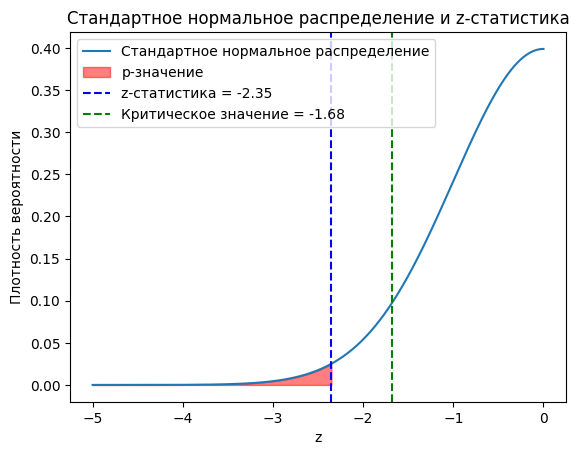

In [47]:
z_values = np.linspace(-5, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем область p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(z_values <= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем Z-статистику и критическое значение
plt.axvline(t_stat, color="blue", linestyle="--", label=f"z-статистика = {t_stat:.2f}")
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 12 (1 балл)

Компания по производству напитков изменила рецепт своего продукта и хочет определить, повлияло ли это на предпочтения потребителей. В тестировании участвовали 200 человек, из которых 110 предпочли новый рецепт, а остальные остались нейтральны или выбрали старый. Можно ли на уровне значимости 1% утверждать, что большинство потребителей предпочитают новый рецепт?

In [52]:
# Данные задачи
n = 200
x = 110
p0 = 0.5
alpha = 0.01

In [53]:
# Выборочная пропорция
phat = x / n
print(f"Выборочная пропорция (p̂): {phat:.2f}")

# Стандартная ошибка
se = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Z-статистика
z_stat = (phat - p0) / se
print(f"z-статистика: {z_stat:.2f}")

# Критические значения
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение t: {z_crit:.2f}")

# Вычисление p-значения
p_value = 1 - norm.cdf(z_stat)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: реальная доля отличается от заявленной")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимых отличий нет")


Выборочная пропорция (p̂): 0.55
Стандартная ошибка (se): 0.04
z-статистика: 1.41
Критическое значение t: 2.33
p-значение: 0.07865
Не отклоняем нулевую гипотезу: статистически значимых отличий нет


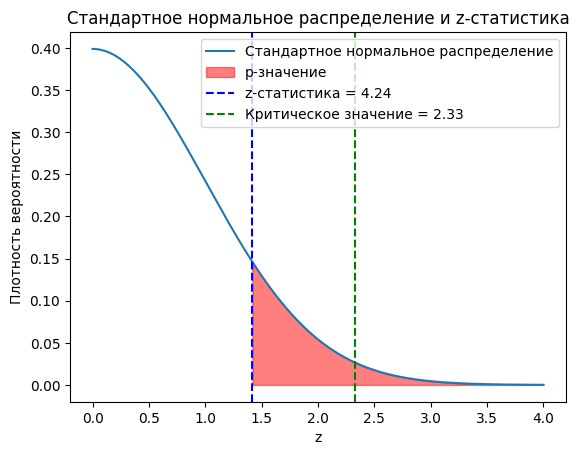

In [54]:
z_values = np.linspace(0, 4, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(z_stat, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}")
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 13 (1 балл)

В ходе эксперимента изучается влияние нового удобрения на рост растений. Группе из 15 растений добавляли новое удобрение, и средний рост составил 25 см с стандартным отклонением 3 см. Контрольная группа из 15 растений без удобрения показала средний рост 22 см с стандартным отклонением 2,5 см. Проверить на уровне значимости 5%, является ли разница в росте статистически значимой.

In [55]:
# Параметры первой группы
n_1 = 15
mean_1 = 25
std_1 = 3

# Параметры второй группы
n_2 = 15
mean_2 = 22
std_2 = 2.5

alpha = 0.05

In [56]:
# Объединенная выборочная дисперсия
df = n_1 + n_2 - 2
sp2 = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n_1 + 1 / n_2))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (mean_1 - mean_2) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print("Отклоняем нулевую гипотезу: уровень роста увеличился")
else:
    print("Не отклоняем нулевую гипотезу: уровень роста без изменений")


Объединенная выборочная дисперсия: 7.62
Стандартная ошибка (se): 1.01
t-статистика: 2.98
Критическое значение t: 1.70
p-значение: 0.00299
Отклоняем нулевую гипотезу: уровень роста увеличился


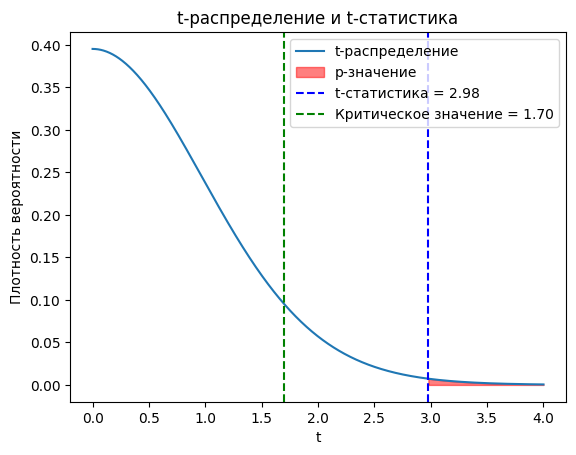

In [57]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= t_stat),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 14 (5 баллов за все пункты)

Пункт 1. Компания внедряет новую программу обучения сотрудников с целью повышения производительности труда. Ранее средняя производительность составляла 50 единиц в день при стандартном отклонении 8 единиц. После года действия программы случайно выбранная выборка из 80 сотрудников показала среднюю производительность 52 единицы. Считаем, что стандартное отклонение осталось неизменным. Можно ли на основе этих данных утверждать, что программа обучения действительно повысила производительность, или наблюдаемый результат мог возникнуть случайно? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста (двусторонний, левосторонний или правосторонний) и проверьте нулевую гипотезу на уровнях значимости α = 1% и α = 5%.

In [75]:
# Исходные данные
n = 80
mu0 = 50
std0 = 8

mu1 = 52

In [76]:
# Стандартная ошибка
se = std0 / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 1%
alpha = 0.01
crit_value_1 = norm.ppf(1 - alpha)

# Определение критического значения для уровня значимости 5%
alpha = 0.05
crit_value_5 = norm.ppf(1 - alpha)

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_1:
    print(
        "На уровне значимости 1% отвергаем нулевую гипотезу: повысилась производительность"
    )
elif z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность"
    )
else:
    print(
        "На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений"
    )

Стандартная ошибка (se): 0.89
p-значение: 0.01267
На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность


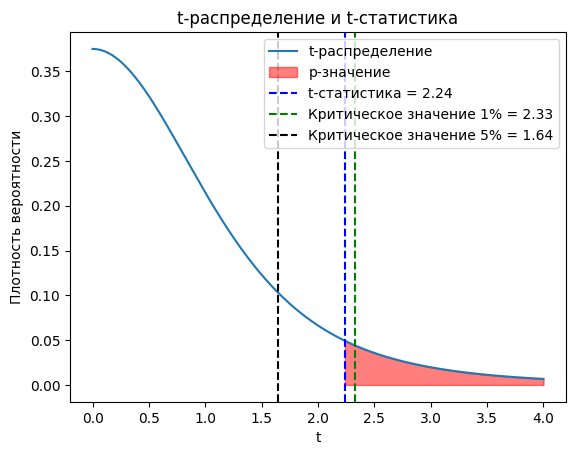

In [77]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_1,
    color="green",
    linestyle="--",
    label=f"Критическое значение 1% = {crit_value_1:.2f}",
)
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Пункт 2. Решите пункт 1, если выборка состоит лишь из 5 сотрудников.

In [78]:
# Исходные данные
n = 5
mu0 = 50
std0 = 8

mu1 = 52

In [79]:
# Стандартная ошибка
se = std0 / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 1%
df = n - 1
alpha = 0.01
crit_value_1 = t.ppf(1 - alpha, df)

# Определение критического значения для уровня значимости 5%
alpha = 0.05
crit_value_5 = t.ppf(1 - alpha, df)

# Шаг p-значение
p_value = 1 - t.cdf(z_score, df)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_1:
    print(
        "На уровне значимости 1% отвергаем нулевую гипотезу: повысилась производительность"
    )
elif z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность"
    )
else:
    print(
        "На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений"
    )

Стандартная ошибка (se): 3.58
p-значение: 0.30298
На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений


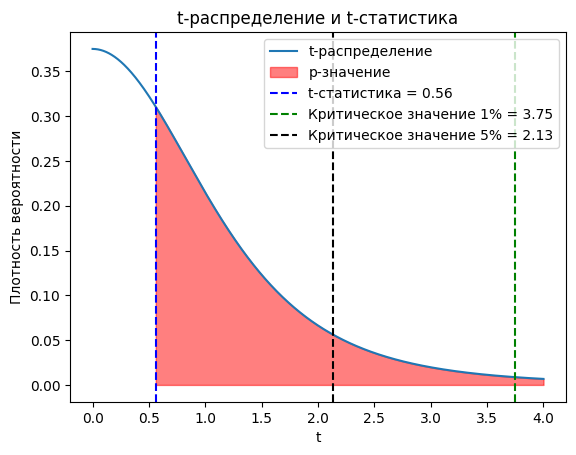

In [80]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_1,
    color="green",
    linestyle="--",
    label=f"Критическое значение 1% = {crit_value_1:.2f}",
)
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.

In [81]:
# Исходные данные
n = 80
mu0 = 50
std0 = 16

mu1 = 52

In [82]:
# Стандартная ошибка
se = std0 / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 1%
alpha = 0.01
crit_value_1 = norm.ppf(1 - alpha)

# Определение критического значения для уровня значимости 5%
alpha = 0.05
crit_value_5 = norm.ppf(1 - alpha)

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_1:
    print(
        "На уровне значимости 1% отвергаем нулевую гипотезу: повысилась производительность"
    )
elif z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность"
    )
else:
    print(
        "На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений"
    )

Стандартная ошибка (se): 1.79
p-значение: 0.13178
На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений


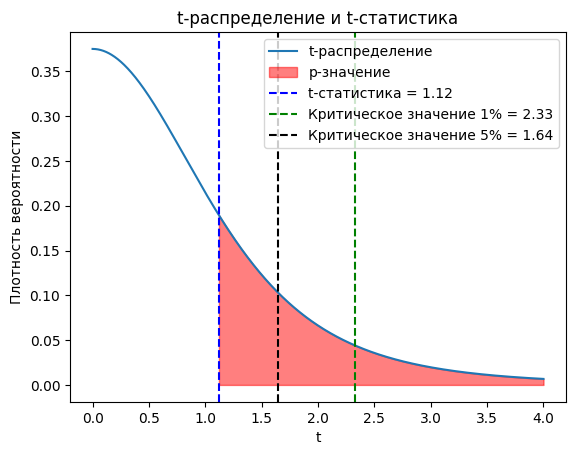

In [83]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_1,
    color="green",
    linestyle="--",
    label=f"Критическое значение 1% = {crit_value_1:.2f}",
)
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.

In [84]:
# Исходные данные
n = 80
mu0 = 50
std0 = 8

mu1 = 51

In [85]:
# Стандартная ошибка
se = std0 / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 1%
alpha = 0.01
crit_value_1 = norm.ppf(1 - alpha)

# Определение критического значения для уровня значимости 5%
alpha = 0.05
crit_value_5 = norm.ppf(1 - alpha)

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_1:
    print(
        "На уровне значимости 1% отвергаем нулевую гипотезу: повысилась производительность"
    )
elif z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность"
    )
else:
    print(
        "На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений"
    )

Стандартная ошибка (se): 0.89
p-значение: 0.13178
На обоих уровнях значимости не можем отвергнуть нулевую гипотезу: производительность без изменений


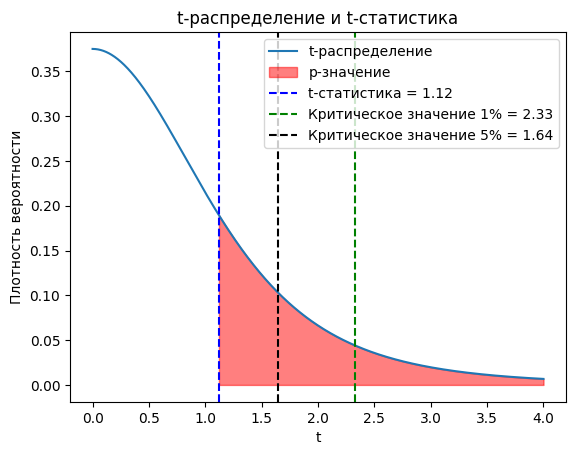

In [86]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_1,
    color="green",
    linestyle="--",
    label=f"Критическое значение 1% = {crit_value_1:.2f}",
)
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

In [100]:
# Исходные данные
n = 25
mu0 = 50
var = 64

mu1 = 52
alpha = 0.05

In [101]:
# Стандартная ошибка
se = var / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 5%
df = n - 1
crit_value_5 = t.ppf(1 - alpha, df)

# Шаг p-значение
p_value = 1 - t.cdf(z_score, df)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: повысилась производительность"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: производительность без изменений")

Стандартная ошибка (se): 12.80
p-значение: 0.43857
Не можем отвергнуть нулевую гипотезу: производительность без изменений


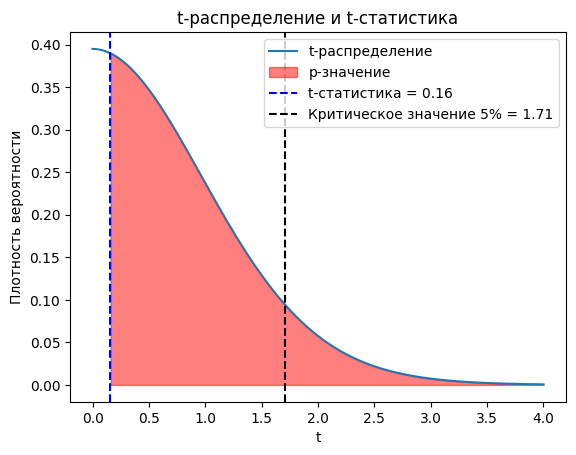

In [102]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 15 (3 балла за все пункты)

Задача 1. Компания оценивает эффективность нового программного обеспечения для повышения производительности сотрудников. Перед установкой ПО среднее время выполнения определённой задачи у 60 сотрудников составляло 100 минут с известным стандартным отклонением 12 минут. После установки нового ПО среднее время выполнения той же задачи снизилось до 95 минут. Считаем, что стандартное отклонение осталось неизменным. Можно ли на уровне значимости α = 5% утверждать, что новое ПО действительно снижает время выполнения задачи? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста и проверьте нулевую гипотезу.

In [120]:
# Исходные данные
n = 60
mu0 = 100
std0 = 12

mu1 = 95
alpha = 0.05

In [121]:
# Стандартная ошибка
se = std0 / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu0 - mu1) / se

# Определение критического значения
crit_value_5 = norm.ppf(1 - alpha)

# p-значение
p_value = 1 - norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений")

Стандартная ошибка (se): 1.55
p-значение: 0.00062
На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи


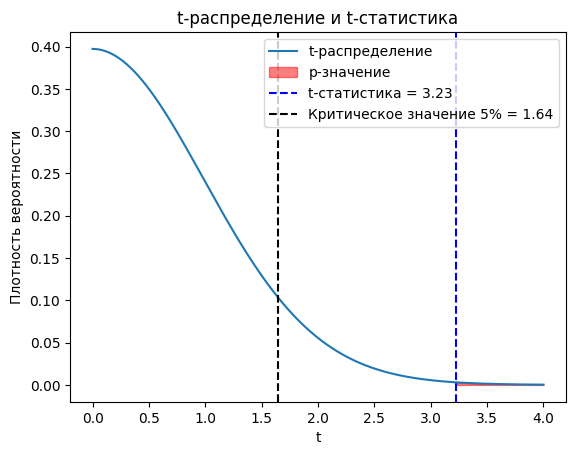

In [122]:
t_values = np.linspace(0, 4, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values >= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².

In [142]:
# Исходные данные
n = 25
mu0 = 100
var = np.sqrt(144)

mu1 = 95
alpha = 0.05

In [143]:
# Стандартная ошибка
se = var / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения для уровня значимости 5%
df = n - 1
crit_value_5 = t.ppf(alpha, df)

# Шаг p-значение
p_value = t.cdf(z_score, df)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value_5:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений")

Стандартная ошибка (se): 2.40
p-значение: 0.02402
Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений


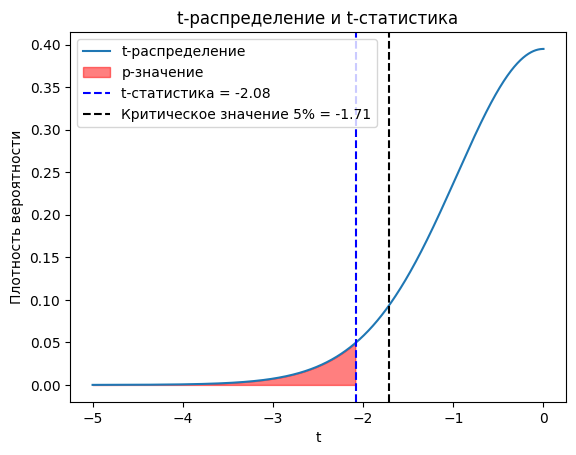

In [144]:
t_values = np.linspace(-5, 0, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values <= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value_5,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?

In [151]:
# Данные задачи
n1 = 50
x1_mean = 100
s1 = 12

n2 = 50
x2_mean = 95
s2 = 12

alpha = 0.05

In [152]:
# Объединенная выборочная дисперсия
df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
print(f"Объединенная выборочная дисперсия: {sp2:.2f}")

# Стандартная ошибка
se = np.sqrt(sp2 * (1 / n1 + 1 / n2))
print(f"Стандартная ошибка (se): {se:.2f}")

# t-статистика
t_stat = (x2_mean - x1_mean) / se
print(f"t-статистика: {t_stat:.2f}")

# Критическое значение t
t_crit = t.ppf(1 - alpha, df)
print(f"Критическое значение t: {t_crit:.2f}")

# p-значение
p_value = 1 - t.cdf(t_stat, df)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if t_stat > t_crit:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений")

Объединенная выборочная дисперсия: 144.00
Стандартная ошибка (se): 2.40
t-статистика: -2.08
Критическое значение t: 1.66
p-значение: 0.98009
Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений


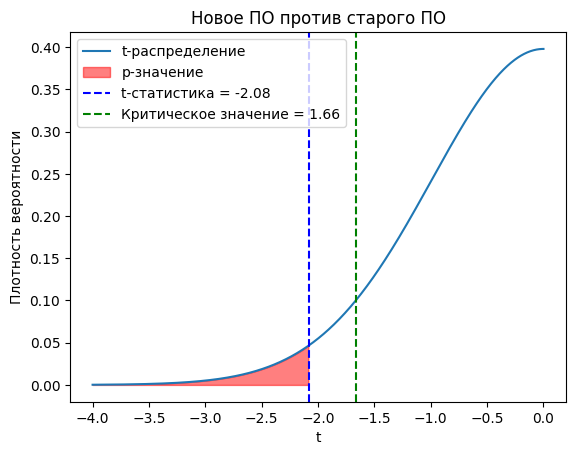

In [154]:
t_values = np.linspace(-4, 0, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(abs(t_values) >= abs(t_stat)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(t_stat, color="blue", linestyle="--", label=f"t-статистика = {t_stat:.2f}")

# Отмечаем критическое значение
plt.axvline(
    -t_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {t_crit:.2f}",
)

plt.legend()
plt.title("Новое ПО против старого ПО")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.

In [162]:
# Исходные данные
sigma = 5
n = 30
x_mean = 75
mu0 = 80
alpha = 0.01

In [163]:
# Стандартная ошибка
se = sigma / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# z-статистика
z_score = (x_mean - mu0) / se
print(f"z-статистика: {z_score:.2f}")

# Критическое значение
z_crit = norm.ppf(alpha)
print(f"Критическое значение: {z_crit:.2f}")

# p-значение
p_value = norm.cdf(z_score)
print(f"p-значение: {p_value:.5f}")

# Принятие решения
if z_score > z_crit:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений")

Стандартная ошибка (se): 0.91
z-статистика: -5.48
Критическое значение: -2.33
p-значение: 0.00000
Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений


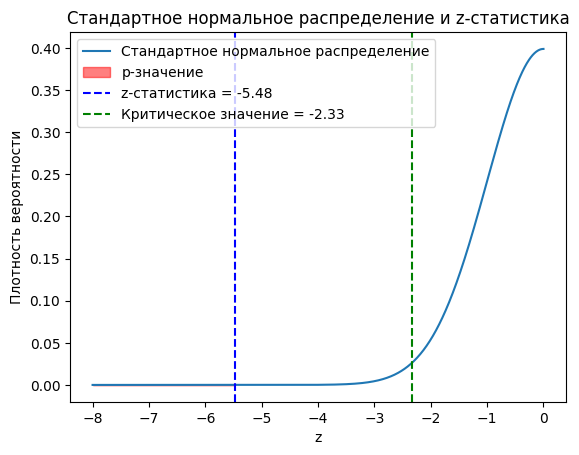

In [164]:
z_values = np.linspace(-8, 0, 1000)
pdf = norm.pdf(z_values)

# Построение графика
plt.plot(z_values, pdf, label="Стандартное нормальное распределение")

# Закрашиваем области p-значения
plt.fill_between(
    z_values,
    pdf,
    where=(abs(z_values) >= abs(z_score)),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем z-статистику и критическое значение
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"z-статистика = {z_score:.2f}"
)
plt.axvline(
    z_crit,
    color="green",
    linestyle="--",
    label=f"Критическое значение = {z_crit:.2f}",
)

plt.legend()
plt.title("Стандартное нормальное распределение и z-статистика")
plt.xlabel("z")
plt.ylabel("Плотность вероятности")

plt.show()

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

In [169]:
# Исходные данные
var = np.sqrt(25)
n = 30
mu1 = 75
mu0 = 80
alpha = 0.01

In [170]:
# Стандартная ошибка
se = var / np.sqrt(n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Вычисление статистики теста
z_score = (mu1 - mu0) / se

# Определение критического значения
df = n - 1
crit_value = t.ppf(alpha, df)

# Шаг p-значение
p_value = t.cdf(z_score, df)
print(f"p-значение: {p_value:.5f}")

# Проверка нулевой гипотезы
if z_score > crit_value:
    print(
        "На уровне значимости 5% отвергаем нулевую гипотезу: ПО действительно снижает время выполнения задачи"
    )
else:
    print("Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений")

Стандартная ошибка (se): 0.91
p-значение: 0.00000
Не можем отвергнуть нулевую гипотезу: время выполнения задачи без изменений


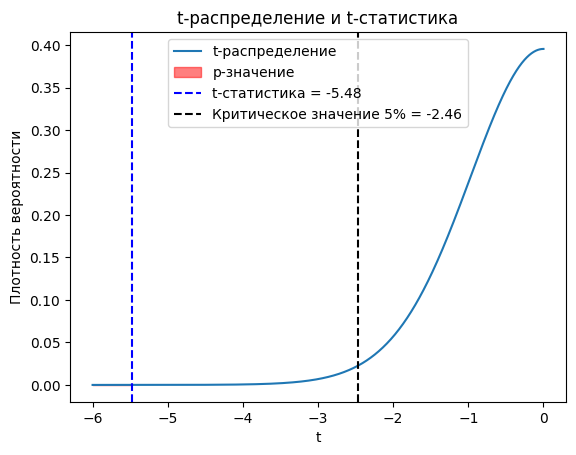

In [171]:
t_values = np.linspace(-6, 0, 1000)
pdf = t.pdf(t_values, df)

# Построение графика
plt.plot(t_values, pdf, label="t-распределение")

# Закрашиваем область p-значения
plt.fill_between(
    t_values,
    pdf,
    where=(t_values <= z_score),
    color="red",
    alpha=0.5,
    label="p-значение",
)

# Отмечаем t-статистику
plt.axvline(
    z_score, color="blue", linestyle="--", label=f"t-статистика = {z_score:.2f}"
)

# Отмечаем критическое значение
plt.axvline(
    crit_value,
    color="black",
    linestyle="--",
    label=f"Критическое значение 5% = {crit_value_5:.2f}",
)

plt.legend()
plt.title("t-распределение и t-статистика")
plt.xlabel("t")
plt.ylabel("Плотность вероятности")

plt.show()

### Задача 16 (4 балла за все пункты)

Монетку подбросили n=150 раз. Из них выпало Y орлов. Вероятность выпадения орла равна p.

(a) При каких значениях Y вы отвергнете нулевую гипотезу H0:p=1/2 против односторонней альтернативы p>1/2 на уровне значимости α=0.05?

In [190]:
# Данные задачи
n = 150
p0 = 1 / 2
alpha = 0.05

In [191]:
# Критическое значение Z
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Стандартная ошибка
se = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Критическое значение выборочной пропорции
p_hat_critical = p0 + z_crit * se
print(f"Критическая выборочная пропорция (p̂_кр): {p_hat_critical:.2f}")

# Критическое значение Y
Y_critical = p_hat_critical * n
print(f"Критическое значение Y_кр (до округления): {Y_critical:.2f}")

# Округляем вверх до ближайшего целого
Y_critical_int = int(np.ceil(Y_critical))
print(f"Критическое значение Y_кр (целое): {Y_critical_int}")

# Проверка: вычисляем Z для Y
Y_test = Y_critical_int
p_hat_test = Y_test / n
Z_test = (p_hat_test - p0) / se
p_value = 1 - norm.cdf(Z_test)
print(f"\nПроверка для Y = {Y_test}:")
print(f"Выборочная пропорция (p̂): {p_hat_test:.2f}")
print(f"z-статистика: {Z_test:.2f}")
print(f"p-значение: {p_value:.5f}")

# Выводим критические значения Y для диапазона Y
print("\nКритические значения Y и соответствующие p-значения:")
print("Y\tp-value\t\tDecision")
for Y in range(Y_critical_int - 2, Y_critical_int + 3):
    p_hat = Y / n
    Z = (p_hat - p0) / se
    p_value = 1 - norm.cdf(Z)
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"{Y}\t{p_value:.5f}\t{decision}")


Критическое значение: 1.64
Стандартная ошибка (se): 0.04
Критическая выборочная пропорция (p̂_кр): 0.57
Критическое значение Y_кр (до округления): 85.07
Критическое значение Y_кр (целое): 86

Проверка для Y = 86:
Выборочная пропорция (p̂): 0.57
z-статистика: 1.80
p-значение: 0.03622

Критические значения Y и соответствующие p-значения:
Y	p-value		Decision
84	0.07082	Fail to reject H0
85	0.05124	Fail to reject H0
86	0.03622	Reject H0
87	0.02502	Reject H0
88	0.01688	Reject H0


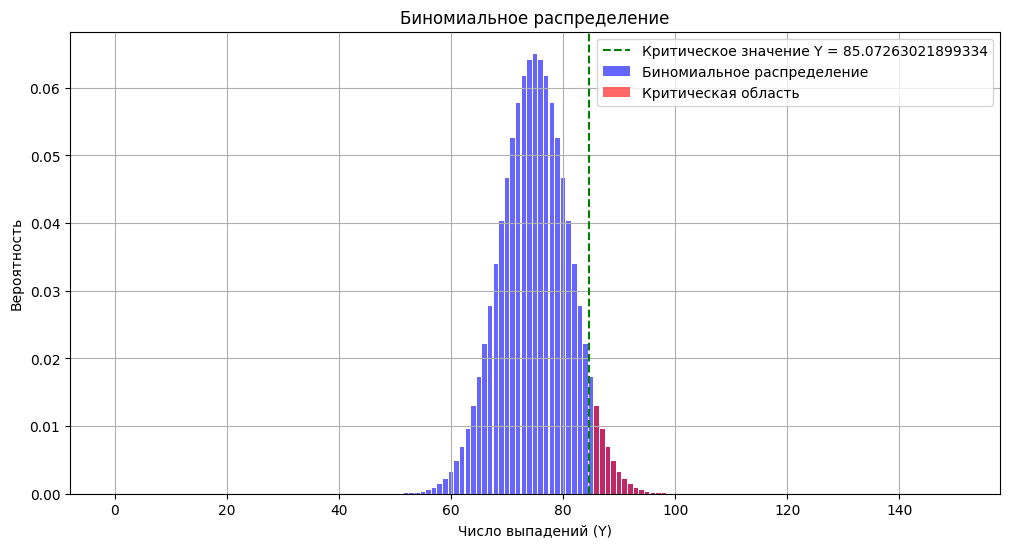

In [192]:
# Вычисляем вероятности для всех возможных Y
Y_values = np.arange(0, n + 1)
probabilities = binom.pmf(Y_values, n, p0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(
    Y_values, probabilities, color="blue", alpha=0.6, label="Биномиальное распределение"
)

# Закрашиваем критическую область
plt.bar(
    Y_values[Y_values >= Y_critical],
    probabilities[Y_values >= Y_critical],
    color="red",
    alpha=0.6,
    label="Критическая область",
)

plt.axvline(
    Y_critical - 0.5,
    color="green",
    linestyle="--",
    label=f"Критическое значение Y = {Y_critical}",
)
plt.title("Биномиальное распределение")
plt.xlabel("Число выпадений (Y)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)

plt.show()

(b) Предположим, что на самом деле H0​ не выполняется, а выполняется H1​, и вероятность выпадения орла равна p=1/2+δ, где δ=1/10. При этом мы не знаем точное значение p, но действуем согласно нашему критерию. С какой вероятностью мы при этом отвергнем гипотезу H0​? Какова вероятность совершить ошибку второго рода (не отвергнуть H0​, когда H1​ истинна)?

In [193]:
# Данные задачи
n = 150
p0 = 1 / 2 + 1 / 10
alpha = 0.05

In [194]:
# Критическое значение Z
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Стандартная ошибка
se = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Критическое значение выборочной пропорции
p_hat_critical = p0 + z_crit * se
print(f"Критическая выборочная пропорция (p̂_кр): {p_hat_critical:.2f}")

# Критическое значение Y
Y_critical = p_hat_critical * n
print(f"Критическое значение Y_кр (до округления): {Y_critical:.2f}")

# Округляем вверх до ближайшего целого
Y_critical_int = int(np.ceil(Y_critical))
print(f"Критическое значение Y_кр (целое): {Y_critical_int}")

# Проверка: вычисляем Z для Y
Y_test = Y_critical_int
p_hat_test = Y_test / n
Z_test = (p_hat_test - p0) / se
p_value = 1 - norm.cdf(Z_test)
print(f"\nПроверка для Y = {Y_test}:")
print(f"Выборочная пропорция (p̂): {p_hat_test:.2f}")
print(f"z-статистика: {Z_test:.2f}")
print(f"p-значение: {p_value:.5f}")

# Выводим критические значения Y для диапазона Y
print("\nКритические значения Y и соответствующие p-значения:")
print("Y\tp-value\t\tDecision")
for Y in range(Y_critical_int - 2, Y_critical_int + 3):
    p_hat = Y / n
    Z = (p_hat - p0) / se
    p_value = 1 - norm.cdf(Z)
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"{Y}\t{p_value:.5f}\t{decision}")

Критическое значение: 1.64
Стандартная ошибка (se): 0.04
Критическая выборочная пропорция (p̂_кр): 0.67
Критическое значение Y_кр (до округления): 99.87
Критическое значение Y_кр (целое): 100

Проверка для Y = 100:
Выборочная пропорция (p̂): 0.67
z-статистика: 1.67
p-значение: 0.04779

Критические значения Y и соответствующие p-значения:
Y	p-value		Decision
98	0.09121	Fail to reject H0
99	0.06681	Fail to reject H0
100	0.04779	Reject H0
101	0.03338	Reject H0
102	0.02275	Reject H0


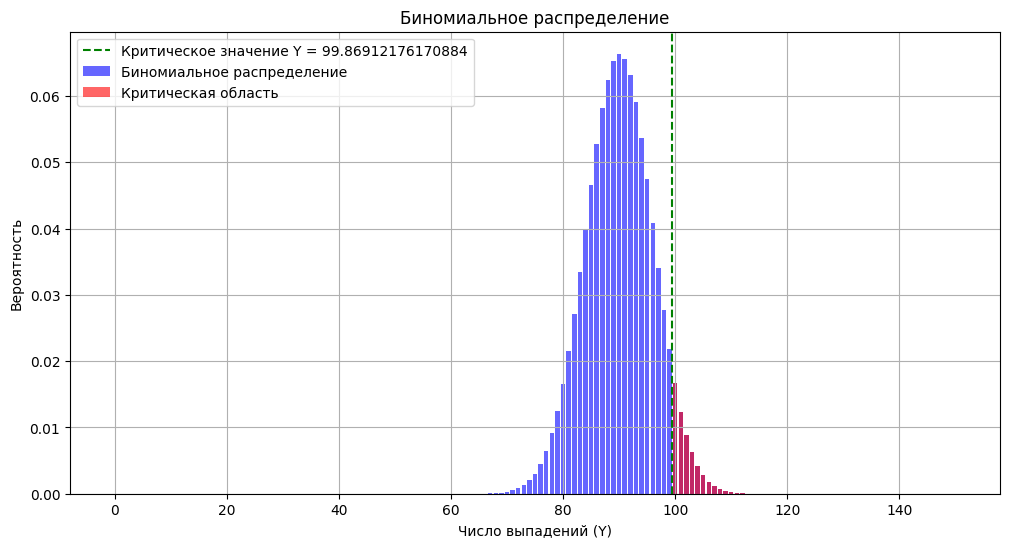

In [195]:
# Вычисляем вероятности для всех возможных Y
Y_values = np.arange(0, n + 1)
probabilities = binom.pmf(Y_values, n, p0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(
    Y_values, probabilities, color="blue", alpha=0.6, label="Биномиальное распределение"
)

# Закрашиваем критическую область
plt.bar(
    Y_values[Y_values >= Y_critical],
    probabilities[Y_values >= Y_critical],
    color="red",
    alpha=0.6,
    label="Критическая область",
)

plt.axvline(
    Y_critical - 0.5,
    color="green",
    linestyle="--",
    label=f"Критическое значение Y = {Y_critical}",
)
plt.title("Биномиальное распределение")
plt.xlabel("Число выпадений (Y)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)

plt.show()

(c) Решите ту же задачу для δ=1/100.

In [196]:
# Данные задачи
n = 150
p0 = 1 / 2 + 1 / 100
alpha = 0.05

In [197]:
# Критическое значение Z
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Стандартная ошибка
se = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Критическое значение выборочной пропорции
p_hat_critical = p0 + z_crit * se
print(f"Критическая выборочная пропорция (p̂_кр): {p_hat_critical:.2f}")

# Критическое значение Y
Y_critical = p_hat_critical * n
print(f"Критическое значение Y_кр (до округления): {Y_critical:.2f}")

# Округляем вверх до ближайшего целого
Y_critical_int = int(np.ceil(Y_critical))
print(f"Критическое значение Y_кр (целое): {Y_critical_int}")

# Проверка: вычисляем Z для Y
Y_test = Y_critical_int
p_hat_test = Y_test / n
Z_test = (p_hat_test - p0) / se
p_value = 1 - norm.cdf(Z_test)
print(f"\nПроверка для Y = {Y_test}:")
print(f"Выборочная пропорция (p̂): {p_hat_test:.2f}")
print(f"z-статистика: {Z_test:.2f}")
print(f"p-значение: {p_value:.5f}")

# Выводим критические значения Y для диапазона Y
print("\nКритические значения Y и соответствующие p-значения:")
print("Y\tp-value\t\tDecision")
for Y in range(Y_critical_int - 2, Y_critical_int + 3):
    p_hat = Y / n
    Z = (p_hat - p0) / se
    p_value = 1 - norm.cdf(Z)
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"{Y}\t{p_value:.5f}\t{decision}")

Критическое значение: 1.64
Стандартная ошибка (se): 0.04
Критическая выборочная пропорция (p̂_кр): 0.58
Критическое значение Y_кр (до округления): 86.57
Критическое значение Y_кр (целое): 87

Проверка для Y = 87:
Выборочная пропорция (p̂): 0.58
z-статистика: 1.71
p-значение: 0.04317

Критические значения Y и соответствующие p-значения:
Y	p-value		Decision
85	0.08252	Fail to reject H0
86	0.06037	Fail to reject H0
87	0.04317	Reject H0
88	0.03017	Reject H0
89	0.02059	Reject H0


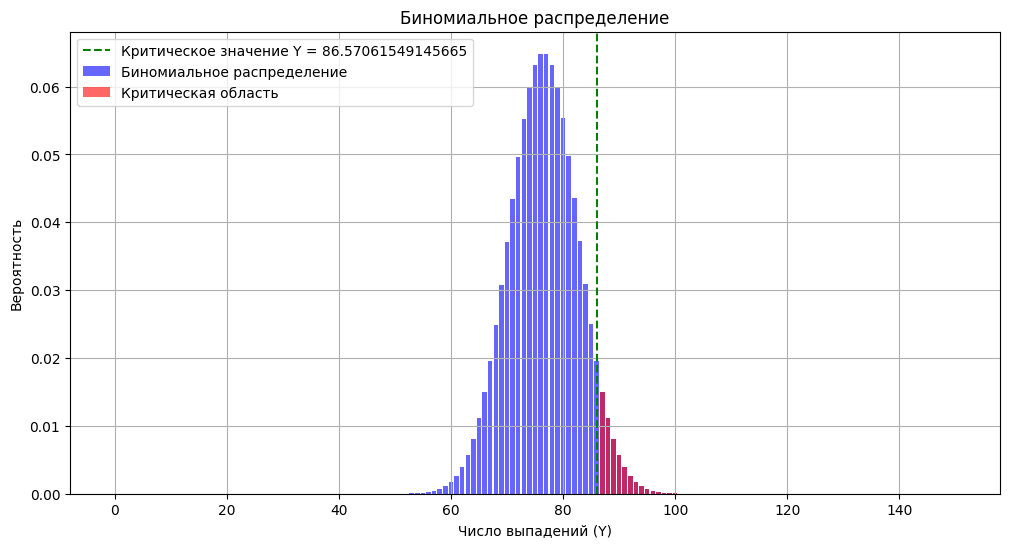

In [198]:
# Вычисляем вероятности для всех возможных Y
Y_values = np.arange(0, n + 1)
probabilities = binom.pmf(Y_values, n, p0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(
    Y_values, probabilities, color="blue", alpha=0.6, label="Биномиальное распределение"
)

# Закрашиваем критическую область
plt.bar(
    Y_values[Y_values >= Y_critical],
    probabilities[Y_values >= Y_critical],
    color="red",
    alpha=0.6,
    label="Критическая область",
)

plt.axvline(
    Y_critical - 0.5,
    color="green",
    linestyle="--",
    label=f"Критическое значение Y = {Y_critical}",
)
plt.title("Биномиальное распределение")
plt.xlabel("Число выпадений (Y)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)

plt.show()

(d) Решите ту же задачу для δ=1/100 и n=1000.

In [199]:
# Данные задачи
n = 1000
p0 = 1 / 2 + 1 / 100
alpha = 0.05

In [200]:
# Критическое значение Z
z_crit = norm.ppf(1 - alpha)
print(f"Критическое значение: {z_crit:.2f}")

# Стандартная ошибка
se = np.sqrt(p0 * (1 - p0) / n)
print(f"Стандартная ошибка (se): {se:.2f}")

# Критическое значение выборочной пропорции
p_hat_critical = p0 + z_crit * se
print(f"Критическая выборочная пропорция (p̂_кр): {p_hat_critical:.2f}")

# Критическое значение Y
Y_critical = p_hat_critical * n
print(f"Критическое значение Y_кр (до округления): {Y_critical:.2f}")

# Округляем вверх до ближайшего целого
Y_critical_int = int(np.ceil(Y_critical))
print(f"Критическое значение Y_кр (целое): {Y_critical_int}")

# Проверка: вычисляем Z для Y
Y_test = Y_critical_int
p_hat_test = Y_test / n
Z_test = (p_hat_test - p0) / se
p_value = 1 - norm.cdf(Z_test)
print(f"\nПроверка для Y = {Y_test}:")
print(f"Выборочная пропорция (p̂): {p_hat_test:.2f}")
print(f"z-статистика: {Z_test:.2f}")
print(f"p-значение: {p_value:.5f}")

# Выводим критические значения Y для диапазона Y
print("\nКритические значения Y и соответствующие p-значения:")
print("Y\tp-value\t\tDecision")
for Y in range(Y_critical_int - 2, Y_critical_int + 3):
    p_hat = Y / n
    Z = (p_hat - p0) / se
    p_value = 1 - norm.cdf(Z)
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"{Y}\t{p_value:.5f}\t{decision}")

Критическое значение: 1.64
Стандартная ошибка (se): 0.02
Критическая выборочная пропорция (p̂_кр): 0.54
Критическое значение Y_кр (до округления): 536.00
Критическое значение Y_кр (целое): 537

Проверка для Y = 537:
Выборочная пропорция (p̂): 0.54
z-статистика: 1.71
p-значение: 0.04382

Критические значения Y и соответствующие p-значения:
Y	p-value		Decision
535	0.05689	Fail to reject H0
536	0.05001	Fail to reject H0
537	0.04382	Reject H0
538	0.03826	Reject H0
539	0.03329	Reject H0


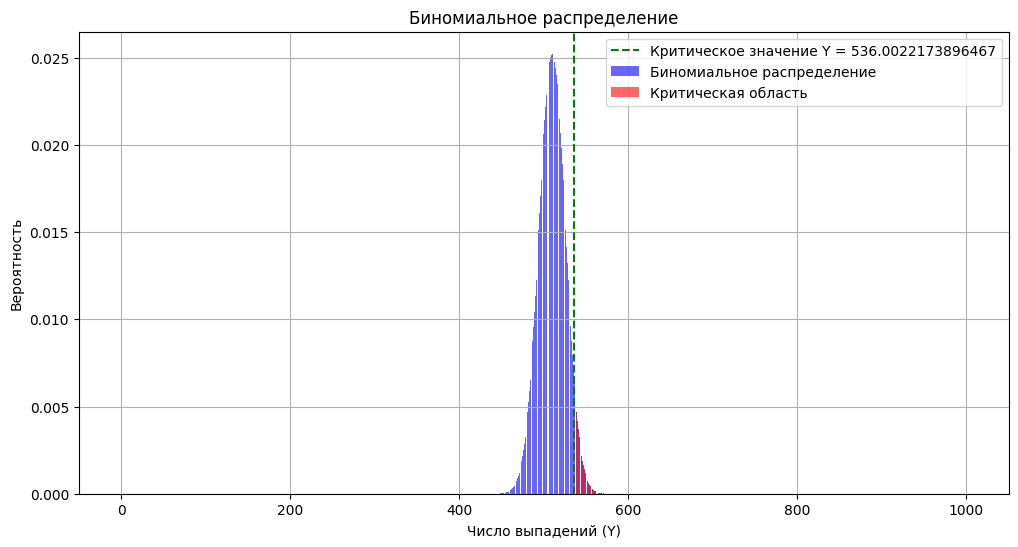

In [201]:
# Вычисляем вероятности для всех возможных Y
Y_values = np.arange(0, n + 1)
probabilities = binom.pmf(Y_values, n, p0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(
    Y_values, probabilities, color="blue", alpha=0.6, label="Биномиальное распределение"
)

# Закрашиваем критическую область
plt.bar(
    Y_values[Y_values >= Y_critical],
    probabilities[Y_values >= Y_critical],
    color="red",
    alpha=0.6,
    label="Критическая область",
)

plt.axvline(
    Y_critical - 0.5,
    color="green",
    linestyle="--",
    label=f"Критическое значение Y = {Y_critical}",
)
plt.title("Биномиальное распределение")
plt.xlabel("Число выпадений (Y)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)

plt.show()